In [1]:
%load_ext autoreload
%autoreload 2

Quantum Coin Flip Circuit:


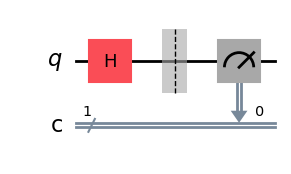


Running quantum simulation jobs...
(1000 jobs with 1024 shots each)


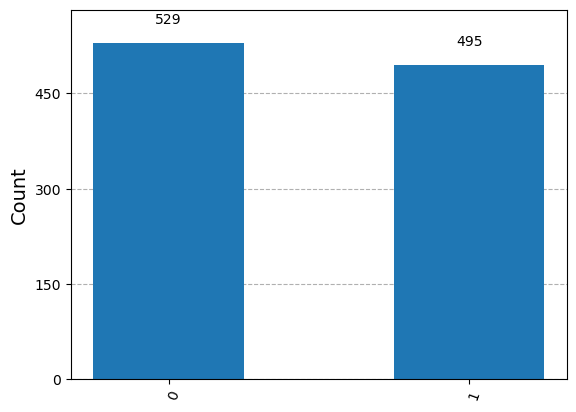


Analysis Results for Tails (1):
mean_success_rate: 49.97%
std_success_rate: 1.51%
min_success_rate: 45.02%
max_success_rate: 54.39%
total_trials: 1000
target_value: 0

Average counts per job:
Average number of heads (0): 512.27
Average number of tails (1): 511.73

Plotting success rate distribution for tails...

Plotting analysis for analyzer 0:

Exporting results...


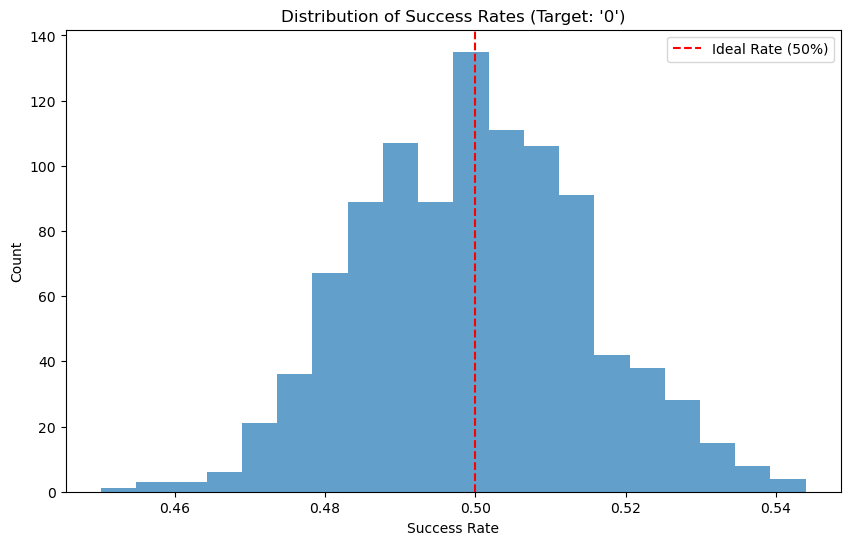

In [2]:
from qiskit_qward.examples.flip_coin.scanner import ScanningQuantumFlipCoin

# Cell 2 - Create and Display Circuit
# Create a flip coin scanner
scanner = ScanningQuantumFlipCoin(use_barriers=True)

# Display the circuit
print("Quantum Coin Flip Circuit:")
circuit_fig = scanner.draw()
display(circuit_fig)

# Cell 3 - Run Simulation and Analysis
# Run multiple jobs with many shots each to gather statistics
print("\nRunning quantum simulation jobs...")
print("(1000 jobs with 1024 shots each)")
results = scanner.run_simulation(
    show_histogram=True,  # Show histogram of first job
    num_jobs=1000,  # Number of independent jobs
    shots_per_job=1024,  # Number of coin flips per job
)

# Display analysis results for tails (1)
print("\nAnalysis Results for Tails (1):")
analysis = results["analysis"]["analyzer_0"]  # Get the first analyzer's results
for key, value in analysis.items():
    if key == "average_counts":
        print(f"\nAverage counts per job:")
        print(f"Average number of heads (0): {value['heads']:.2f}")
        print(f"Average number of tails (1): {value['tails']:.2f}")
    else:
        print(f"{key}: {value:.2%}" if isinstance(value, float) else f"{key}: {value}")

# Cell 4 - Plot Results
# Plot success rate distribution for tails
print("\nPlotting success rate distribution for tails...")
scanner.plot_analysis(ideal_rate=0.5)  # For a fair coin, we expect 50% tails

# Cell 5 - Export Results
# Export results to CSV
print("\nExporting results...")
scanner.analyzers[0].export_results("flip_coin_results.csv")

In [ ]:
# Cell 6 - Run on IBM Quantum Hardware
print("\nRunning on IBM Quantum Hardware...")
print("(Single job with 1024 shots)")

# Create a new scanner for IBM run to keep results separate
ibm_scanner = ScanningQuantumFlipCoin(use_barriers=True)

# Run on IBM with a single job
ibm_results = ibm_scanner.run_on_ibm()

if ibm_results["status"] == "completed":
    print(f"\nBackend used: {ibm_results['backend']}")
    print(f"Job ID: {ibm_results['job_id']}")

    print("\nResults from IBM Quantum:")
    counts = ibm_results["counts"]
    total_shots = sum(counts.values())
    heads = counts.get("0", 0)
    tails = counts.get("1", 0)

    print(f"Total shots: {total_shots}")
    print(f"Heads (0): {heads} ({heads/total_shots:.2%})")
    print(f"Tails (1): {tails} ({tails/total_shots:.2%})")

    # Compare with simulation averages
    print("\nComparison with simulation averages:")
    print(f"Simulation - Tails rate: {analysis['average_counts']['tails']/1024:.2%}")
    print(f"IBM Q     - Tails rate: {tails/total_shots:.2%}")
else:
    print(f"\nIBM Quantum execution failed:")
    print(f"Status: {ibm_results['status']}")
    if "error" in ibm_results:
        print(f"Error: {ibm_results['error']}")


Running on IBM Quantum Hardware...
(Single job with 1024 shots)
Using backend: ibm_sherbrooke
Pending jobs: 44
>>> Job ID: czp5w78d8drg008gakg0
>>> Job Status: QUEUED
>>> Compilation time: 5.392 seconds
>>> Job Status: QUEUED (Poll #1)
>>> Job Status: QUEUED (Poll #2)
>>> Job Status: QUEUED (Poll #3)
>>> Job Status: QUEUED (Poll #4)
>>> Job Status: QUEUED (Poll #5)
>>> Job Status: QUEUED (Poll #6)
>>> Job Status: QUEUED (Poll #7)
>>> Job Status: QUEUED (Poll #8)
>>> Job Status: QUEUED (Poll #9)
>>> Job Status: QUEUED (Poll #10)
>>> Job Status: QUEUED (Poll #11)
>>> Job Status: QUEUED (Poll #12)
>>> Job Status: QUEUED (Poll #13)
>>> Job Status: QUEUED (Poll #14)
>>> Job Status: QUEUED (Poll #15)
>>> Job Status: QUEUED (Poll #16)
>>> Job Status: QUEUED (Poll #17)
>>> Job Status: QUEUED (Poll #18)
>>> Job Status: QUEUED (Poll #19)
>>> Job Status: QUEUED (Poll #20)
>>> Job Status: QUEUED (Poll #21)
>>> Job Status: QUEUED (Poll #22)
>>> Job Status: QUEUED (Poll #23)
>>> Job Status: QUEUED 